# Problem 2:

## A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks.

### You will ONLY use “Description” column for the initial text mining exercise.

1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame. 
2. Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.
3. The following exercise is to be done for both the corpora:
    - a) Find the number of characters for both the corpuses.
    - b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)
    - c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?
    - d) Plot the Word Cloud for both the corpora.
4. Refer to both the word clouds. What do you infer?
5. Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

## 2.1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame. 

In [511]:
print('Imported Required Library :')
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.style
plt.style.use('seaborn')
import matplotlib.style
plt.style.use('seaborn')
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

Imported Required Library :


### Head of the data set :

In [512]:
df = pd.read_csv('Shark Tank Companies (2) (3).csv')
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


### Tail of the Data set :

In [513]:
df.tail()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
490,True,Zoom Interiors is a virtual service for interi...,28,Online Services,"Beatrice Fischel-Bock, Madeine Fraser & Lizzie...","Philadelphia, PA",https://zoominteriors.com,100000,20,500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Zoom Interiors,6-28,False
491,True,Spikeball started out as a casual outdoors gam...,29,Toys and Games,Chris Ruder,"Chicago, IL",http://spikeball.com,500000,10,5000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Spikeball,6-29,False
492,True,Shark Wheel is out to literally reinvent the w...,29,Outdoor Recreation,David Patrick and Zack Fleishman,"Lake Forest, CA",http://www.sharkwheel.com,100000,5,2000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Shark Wheel,6-29,True
493,False,Adriana Montano wants to open the first Cat Ca...,29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False
494,True,"Sway Motorsports makes a three-wheeled, all-el...",29,Automotive,Joe Wilcox,"Palo Alto, CA",http://www.swaymotorsports.com,300000,10,3000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Sway Motorsports,6-29,False


### Picked the Dependent variable ('Deal') and Description Columns :

In [514]:
print("Head of Data :")
df1 = df[['deal','description']]
df1.head()

Head of Data :


,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...


In [515]:
print("Tail of Data :")
df1.tail()

Tail of Data :


,deal,description
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...
494,True,"Sway Motorsports makes a three-wheeled, all-el..."


In [516]:
print('Total Count of Deal:')
df.deal.value_counts()

Total Count of Deal:


True     251
False    244
Name: deal, dtype: int64

## 2.2.Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.

In [517]:
df1['deal']=df1['deal'].astype('str')
deal_true = pd.DataFrame()
deal_false = pd.DataFrame()
grouped=df1.groupby(df1.deal)
grouped.head()
deal_true=grouped.get_group("True")
deal_false=grouped.get_group("False")

### Info of the Data set:

In [518]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         495 non-null    object
 1   description  495 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


### Describe of the Data:

In [519]:
df1.describe()

,deal,description
count,495,495
unique,2,493
top,True,"Echo Valley Meats is a retail, online gift cat..."
freq,251,2


### <font color = 'green'>Describle & Info of the Data set with Deal as True:

In [520]:
print('Info:')
print(' ')
deal_true.info()
print('----------------------------------------------------------------------')

Info:
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         251 non-null    object
 1   description  251 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB
----------------------------------------------------------------------


In [521]:
print('Describe:')
deal_true.describe()


Describe:


,deal,description
count,251,251
unique,1,250
top,True,"Echo Valley Meats is a retail, online gift cat..."
freq,251,2


### <font color = 'green'>Describle & Info of the Data set with Deal as False:

In [522]:
print('Info:')
print(' ')
deal_false.info()
print('----------------------------------------------------------------------')

Info:
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 493
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         244 non-null    object
 1   description  244 non-null    object
dtypes: object(2)
memory usage: 5.7+ KB
----------------------------------------------------------------------


In [523]:
print('Describe:')
deal_false.describe()


Describe:


,deal,description
count,244,244
unique,1,243
top,False,Premium wine sold by the glass in individually...
freq,244,2


## 2.3. The following exercise is to be done for both the corpora:
- ### a) Find the number of characters for both the corpuses.
- ### b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)
- ### c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?
- ### d) Plot the Word Cloud for both the corpora

**Removed Deal Column from Deal_True Data:**

As it was not necessary for this data set now.

In [524]:
deal_true.drop(["deal"],axis=1,inplace=True)
deal_true

,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
9,An educational record label and publishing hou...
10,A battery-operated cooking device that siphons...
...,...
489,SynDaver Labs makes synthetic body parts for u...
490,Zoom Interiors is a virtual service for interi...
491,Spikeball started out as a casual outdoors gam...
492,Shark Wheel is out to literally reinvent the w...


- **Lowercase all the words for further analysis:**

In [525]:
deal_true['description']=deal_true['description'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

deal_true['description']=deal_true['description'].str.replace('[^\w\s]',' ')
deal_true

,description
1,retail and wholesale pie factory with two reta...
2,ava the elephant is a godsend for frazzled par...
5,one of the first entrepreneurs to pitch on sha...
9,an educational record label and publishing hou...
10,a battery operated cooking device that siphons...
...,...
489,syndaver labs makes synthetic body parts for u...
490,zoom interiors is a virtual service for interi...
491,spikeball started out as a casual outdoors gam...
492,shark wheel is out to literally reinvent the w...


In [526]:
deal_false['description']=deal_false['description'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

deal_false['description']=deal_false['description'].str.replace('[^\w\s]',' ')
deal_false

,deal,description
0,False,bluetooth device implant for your ear
3,False,organizing packing and moving services deliv...
4,False,interactive media centers for healthcare waiti...
6,False,a mixed martial arts clothing line looking to ...
7,False,attach noted is a detachable arm that holds ...
...,...,...
482,False,buck mason makes high quality men s clothing i...
484,False,frameri answers the question why aren t your...
485,False,the paleo diet bar is a nutrition bar that is ...
488,False,sunscreen mist adds another point of access fo...


______________________________________________________________________________________________________________________


- **The total sume of characters of both the corpuses.**

In [527]:
deal_true["chars"]=deal_true["description"].str.len()
deal_false["chars"]=deal_false["description"].str.len()
sum_true=deal_true["chars"].sum()
sum_false=deal_false["chars"].sum()
print("True Corpus",sum_true)
print("False Corpus",sum_false)

True Corpus 64058
False Corpus 47180


- **Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)**

In [528]:
deal_true=deal_true.astype("str")
deal_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  251 non-null    object
 1   chars        251 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [529]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')


In [530]:
stopword = stopwords.words('english')

In [542]:
# stopword.append('also')
#stopword.append('made')
#stopword.append('makes')
#stopword.append('like')
#stopword.append('this')
#stopword.append('even')
#stopword.append('company')
#stopword.append('A')
#stopword.append('the')
#stopword.append('The')
stop_list = ['also','An','make','You', 'made', 'makes', 'like', 'this','even','company','A','the','The']
stopword.extend(stop_list)
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

- ### Workd Corpus of Deal_True: 

In [544]:

from nltk.tokenize import word_tokenize
print(stopword)
print("True: ")
nsw_true=[]
for x in deal_true["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopword]
    for i in tokens_without_sw:
        nsw_true.append(i)
    print(tokens_without_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- ### Workd Corpus of Deal_False: 

In [533]:
nsw_false=[]
print("False:")
tokens_without_sw_freq=[]
for x in deal_false["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopword]
    print(tokens_without_sw)
    for i in tokens_without_sw:
        nsw_false.append(i)
    print(tokens_without_sw)

False:
['bluetooth', 'device', 'implant', 'ear']
['bluetooth', 'device', 'implant', 'ear']
['organizing', 'packing', 'moving', 'services', 'delivered', 'college', 'women']
['organizing', 'packing', 'moving', 'services', 'delivered', 'college', 'women']
['interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information']
['interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information']
['mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', 'streetwear', 'apparel']
['mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', 'streetwear', 'apparel']
['attach', 'noted', 'detachable', 'arm', 'holds', 'post', 'notes', 'side', 'laptop', 'screen']
['attach', 'noted', 'detachable', 'arm', 'holds', 'post', 'notes', 'side', 'laptop', 'screen

['non', 'stick', 'fabric', 'aisle', 'runners', 'wedding', 'ceremonies', 'special', 'events']
['non', 'stick', 'fabric', 'aisle', 'runners', 'wedding', 'ceremonies', 'special', 'events']
['shirts', 'expectant', 'moms', 'display', 'due', 'date']
['shirts', 'expectant', 'moms', 'display', 'due', 'date']
['professional', 'ghost', 'writing', 'services']
['professional', 'ghost', 'writing', 'services']
['personalized', 'services', 'planning', 'funeral', 'advance', 'partnered', 'large', 'insurance', 'plan', 'gives', 'people', 'opportunity', 'prepay', 'funeral']
['personalized', 'services', 'planning', 'funeral', 'advance', 'partnered', 'large', 'insurance', 'plan', 'gives', 'people', 'opportunity', 'prepay', 'funeral']
['system', 'teach', 'successful', 'sales', 'pitches', 'step', 'step', 'guides', 'say', 'prospective', 'customers']
['system', 'teach', 'successful', 'sales', 'pitches', 'step', 'step', 'guides', 'say', 'prospective', 'customers']
['cargo', 'management', 'system', 'transform', '

['got', 'ta', 'marries', 'muffins', 'mores', 'utterly', 'irresistible', 'muffin', 'classic', 'camping', 'snack', 'grown', 'classy', 'self', 'contained', 'treat', 'delectable', 'always', 'although', 'buttoned', 'muffin', 'still', 'traditional', 'building', 'blocks', 'graham', 'cracker', 'toasted', 'marshmallow', 'chocolate', 'mess', 'around', 'creative', 'flavors', 'best', 'see', 'want', 'mess', 'perfection', 'want', 'mix', 'things', 'though', 'specialized', 'muffins', 'decorated', 'suit', 'occassion', 'whether', 'corporate', 'event', 'wedding', 'something', 'else', 'altogether', 'muffins', 'sold', 'online', 'store', 'available', 'williams', 'sonoma']
['got', 'ta', 'marries', 'muffins', 'mores', 'utterly', 'irresistible', 'muffin', 'classic', 'camping', 'snack', 'grown', 'classy', 'self', 'contained', 'treat', 'delectable', 'always', 'although', 'buttoned', 'muffin', 'still', 'traditional', 'building', 'blocks', 'graham', 'cracker', 'toasted', 'marshmallow', 'chocolate', 'mess', 'around

- **List of Stopwords:**

In [534]:
print(stopword)
print(nsw_false)
print(nsw_true)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- **The top 3 most frequently occurring words in both corpuses (after removing 
stop words)**

In [535]:
print('Top 3 words of Deal_False list :')
freq = nltk.FreqDist(nsw_false)
print(' ')
freq_false=freq.most_common(7)
print(freq_false)
print(' ')
print('______________________________________________________________________________________')
print(' ')
print(' ')
print('Top 3 words of Deal_True list :')
freq = nltk.FreqDist(nsw_true)
print(' ')
freq_true=freq.most_common(3)
print(freq_true)

Top 3 words of Deal_False list :
 
[('designed', 19), ('use', 17), ('water', 17), ('system', 16), ('one', 15), ('product', 15), ('online', 15)]
 
______________________________________________________________________________________
 
 
Top 3 words of Deal_True list :
 
[('free', 23), ('children', 21), ('designed', 21)]


- **Plot the Word Cloud for both the corpora.**

In [536]:
comment_words = ''
val=''
type(nsw_true)
comment_words_true=' '.join(nsw_true)
comment_words_false=' '.join(nsw_false)
print(comment_words)

### Word Cloud Mapping of Deal_True Dataframe in which [Secured a Deal]:

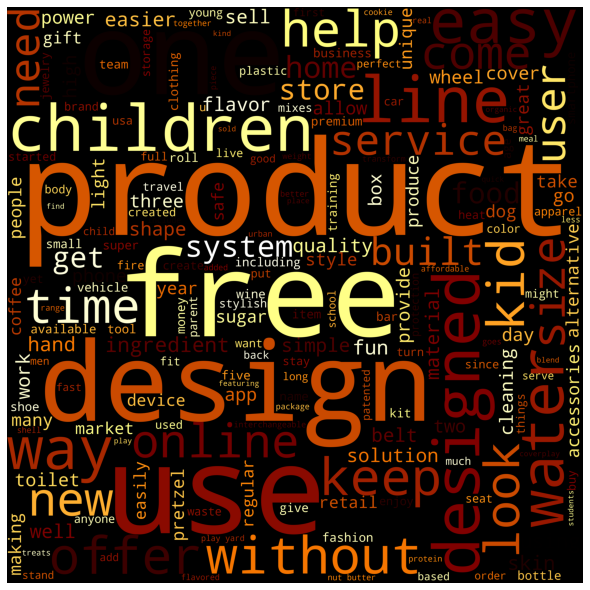

In [537]:
wordcloud = WordCloud(width = 3700, height = 3700,
                background_color ='black',
                colormap='afmhot',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_true)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Word Cloud Mapping of Deal_False Dataframe in which [Did not Secured a Deal]:

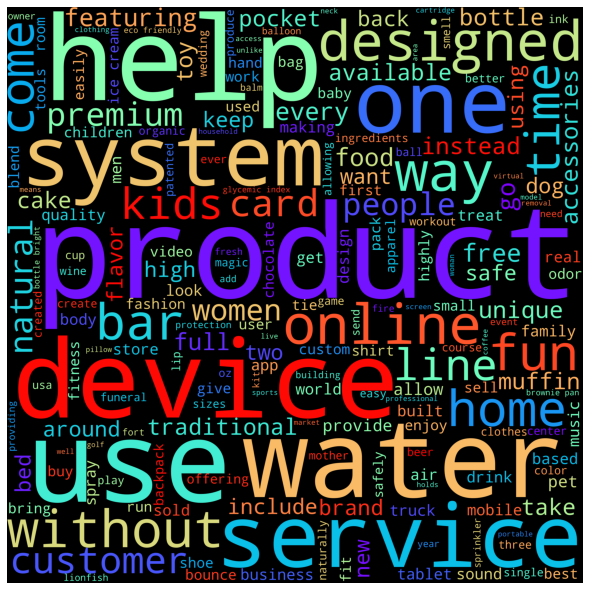

In [538]:
wordcloud = WordCloud(width = 3700, height = 3700,
                background_color ='black',
                colormap='rainbow',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 2.4 Refer to both the word clouds. What do you infer ?

### Inference of Deal_True (Secured a Deal) :

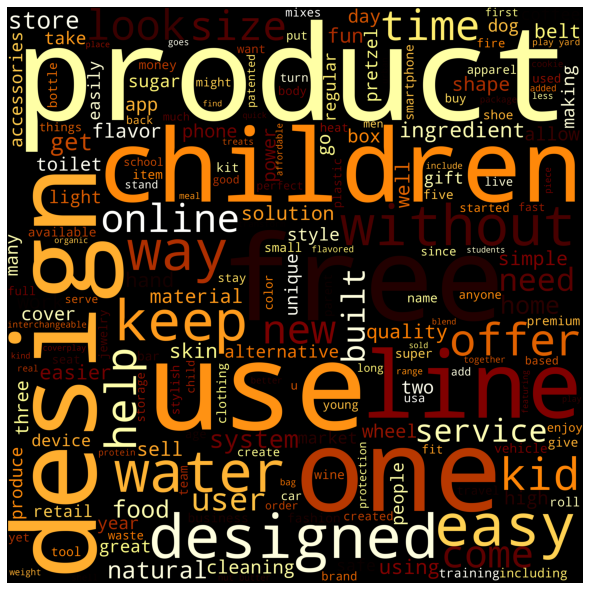

In [539]:
wordcloud = WordCloud(width = 3700, height = 3700,
                background_color ='black',
                colormap='afmhot',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_true)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### <font color='green'>Observation:<font color='black'>
- In Shark Tank dataset, we found 64058 numbers of "Characters".
- In Shark Tank dataset, we found 251 numbers of "Words".
- In Shark Tank dataset, the words which is used maximum time are : 
    - free
    - children  
    - designed 
    - easy      
    - natural   
    - line  
    - product  

### Inference of Deal_False (Did not Secured a Deal) :

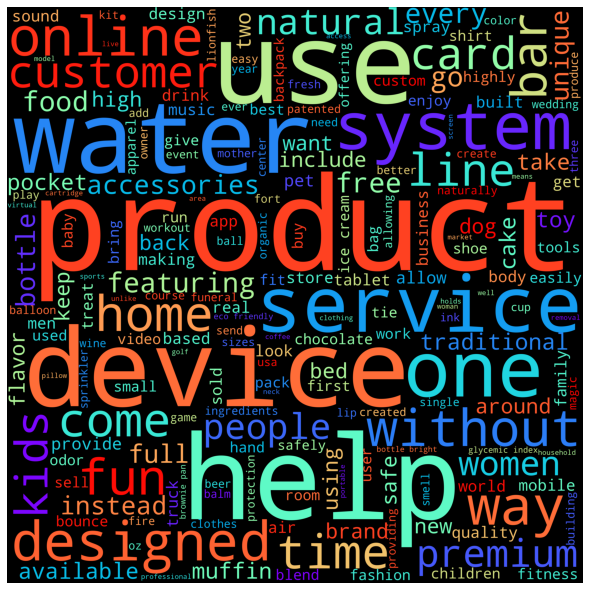

In [540]:
wordcloud = WordCloud(width = 3700, height = 3700,
                background_color ='black',
                colormap='rainbow',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### <font color='green'>Observation:<font color='black'>
- In Shark Tank dataset, we found 47180 numbers of "Characters".
- In Shark Tank dataset, we found 244 numbers of "Words".
- In Shark Tank dataset, the words which is used maximum time are : 
    - designed
    - use  
    - water 
    - system     
    - one   
    - product  
    - online  

## 2.5. Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

### Work Clouds of Deal_False (Did not Secured a Deal) :

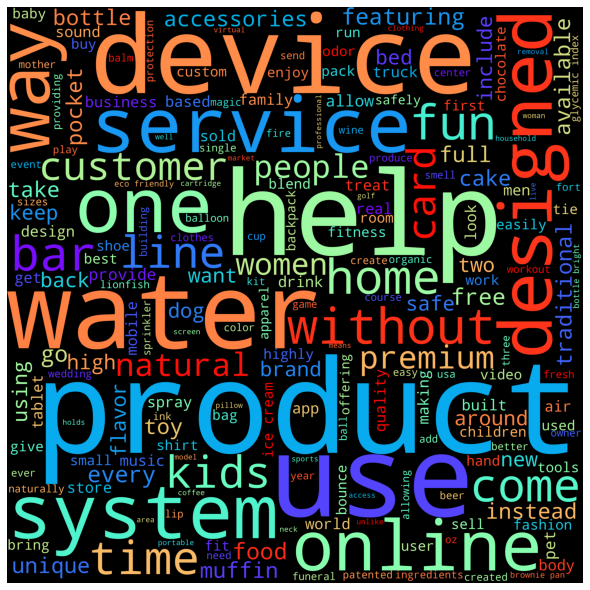

In [541]:
wordcloud = WordCloud(width = 3700, height = 3700,
                background_color ='black',
                colormap='rainbow',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### <font color = 'green'>Observation:<font color ='black'>
    
- Based on the above Word cloud, we can clearly see, that the people who introduce "device" are likely less to secure a deal.
    
- From above Word Cloud, we ccan also see that the word "use" are also less likely to secure a deal.
    
- Also, we can see from Word cloud that the word "help" are less likely to secure a deal.

## END